In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv("en.openfoodfacts.org.products.csv", encoding='utf-8', sep='\t', parse_dates=True, infer_datetime_format=True)

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,27,28,29,31,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [146]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df.shape

(1890337, 186)

In [148]:
name = []
types = []
na_values = []
for c in df.columns:
    name.append(c)
    types.append(df[c].dtypes)
    na_values.append(df[c].isna().sum())
data = {'name' : name, 'types' : types, 'na_values' : na_values}

In [149]:
data = pd.DataFrame(data)

In [150]:
data.head()

,name,types,na_values
0,code,object,0
1,url,object,0
2,creator,object,4
3,created_t,int64,0
4,created_datetime,object,0


In [151]:
data.describe()

,na_values
count,1.860000e+02
mean,1.506917e+06
std,6.089869e+05
min,0.000000e+00
25%,1.403583e+06
50%,1.875806e+06
75%,1.890189e+06
max,1.890337e+06


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       186 non-null    object
 1   types      186 non-null    object
 2   na_values  186 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.5+ KB


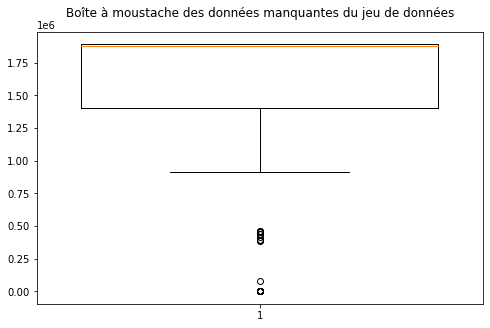

In [153]:
plt.figure(figsize=(8,5))
plt.boxplot(data.na_values, widths=0.8)
plt.title("Boîte à moustache des données manquantes du jeu de données", pad=15)
plt.show()

In [154]:
na = (df.isna().sum().sum()) / (df.shape[0] * df.shape[1])
print(round(na*100,2),'%, soit le nombre de données manquantes dans le dataframe')

79.72 %, soit le nombre de données manquantes dans le dataframe


Avec près de 80% de données manquantes, le jeu de donnée apparait de piètre qualité.<br/>
Cependant, en fonction de notre problématique, nous n'allons pas avoir besoin de toutes les données présentées par Open food fact.<br/>
Aussi après avoir défini notre problématique, nous allons nettoyer les données et voir si nous avons une qualité restante suffisante pour procéder à une analyse pertinente.

L'idée est de créé une application qui permets de trouver par mots clef les produits que l'on souhaite classé dans l'ordre de leur nutri-score.<br/>
En complément et si les données le permettent, une recherche par image pourra être disponible.

# Notebook de nettoyage

# Sommaire <a class='anchor' id='S'></a>

## [I, Sélection des données en fonction de la problématique](#I)

### [A, Données pour le public français et avec des noms de produits](#IA)
### [B, Sélection des indicateurs pertinents pour l'application](#IB)

## [II, Prise en charge des outliers](#II)

## [III, Réduction du nombre de données incomplètes](#III)

### [A, Par suppression](#IIIA)
### [B, Par regression](#IIIB)
### [C, Par classification](#IIIC)
### [D, Comparaison](#IIID)

## I, Sélection des données en fonction de la problématique <a class='anchor' id='I'></a>

### A, Données pour le public français et avec des noms de produits <a class='anchor' id='IA'></a>

L'application commandée l'est par "Santé publique France", cela nous amène à penser qu'elle vise un public vivant en France et francophone. <br/>
De cela, nous décidons donc d'écarter les produits non vendus en France ainsi que les colonnes en langue étrangère.<br/>
<br/><br/>
Parallèlement notre application va fonctionner avec les noms des produits. Aussi nous écarterons les lignes pour lesquelles cette données n'est pas renseignée.


In [155]:
for c in df.columns:
    if 'countr' in c:
        print(c)
        print(df[c].isna().sum())

countries
5690
countries_tags
5695
countries_en
5695


In [156]:
df = df[(df.countries.str.contains('France', case=False)) | (df.countries_tags.str.contains('France', case=False)) | (df.countries_en.str.contains('France', case=False))]

In [157]:
df = df[~df.product_name.isna()]

In [158]:
df.shape

(800080, 186)

On se retrouve avec un dataframe de 800,080 lignes et 186 colonnes.<br/>
Parmis ces colonnes, regardons s'il y en a qui ont très peu de données (moins de 5%)

In [159]:
coef = 800080 - (800080*0.05)

In [160]:
name = []
na_values = []
for c in df.columns:
    name.append(c)
    na_values.append(df[c].isna().sum())
data = {'name' : name, 'na_values' : na_values}

In [161]:
data = pd.DataFrame(data)

In [162]:
col = []
for v in data[data.na_values > coef].name:
    col.append(v)

In [163]:
df = df.loc[:,~df.columns.isin(col)]

In [164]:
data = data.loc[~data.name.isin(col),:]

In [165]:
df.shape

(800080, 76)

# Coupure chargement rapide

In [166]:
#df.to_csv('df.csv')

In [167]:
df = pd.read_csv('df.csv')

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


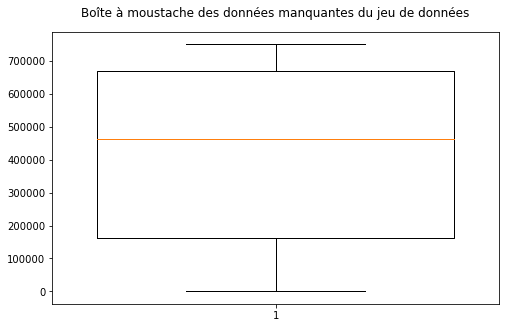

In [168]:
plt.figure(figsize=(8,5))
plt.boxplot(data.na_values, widths=0.8)
plt.title("Boîte à moustache des données manquantes du jeu de données", pad=15)
plt.show()

In [169]:
data.describe()

,na_values
count,76.000000
mean,400210.802632
std,278946.799999
min,0.000000
25%,162807.500000
50%,461577.000000
75%,669782.000000
max,749970.000000


In [170]:
((df.isna().sum().sum()) / (df.shape[0] * df.shape[1]))*100

49.37172029550292

Après ce premier nettoyage, nous nous retrouvons avec un dataframe 800,080 lignes et 135 colonnes.<br/>
Les données manquantes représentent encore 50% des données totales.<br/><br/>
Nous allons nous interresser aux intitulés des colonnes pour affiner encore notre selection.

##### [sommaire](#S) 

### B, Sélection des indicateurs pertinents pour l'application <a class='anchor' id='IB'></a>

In [171]:
for c in df.columns:
    print("Name : ", c, "/  Na values : ", df[c].isna().sum())

Name :  Unnamed: 0 /  Na values :  0
Name :  code /  Na values :  0
Name :  url /  Na values :  0
Name :  creator /  Na values :  1
Name :  created_t /  Na values :  0
Name :  created_datetime /  Na values :  0
Name :  last_modified_t /  Na values :  0
Name :  last_modified_datetime /  Na values :  0
Name :  product_name /  Na values :  0
Name :  generic_name /  Na values :  720938
Name :  quantity /  Na values :  536666
Name :  packaging /  Na values :  621382
Name :  packaging_tags /  Na values :  621389
Name :  brands /  Na values :  371615
Name :  brands_tags /  Na values :  371650
Name :  categories /  Na values :  418454
Name :  categories_tags /  Na values :  418454
Name :  categories_en /  Na values :  418454
Name :  origins /  Na values :  749899
Name :  origins_tags /  Na values :  749970
Name :  origins_en /  Na values :  749970
Name :  manufacturing_places /  Na values :  727874
Name :  manufacturing_places_tags /  Na values :  727914
Name :  labels /  Na values :  549181
N

Le nutriscore est calculé pr rapport à la composition nutritionnelle de 100g des produits. <br/>
Il inclut les facteurs nutritionnels à limiter : énergie (kj/100g), acides gras saturés (g/100g), sucres simples (g/100g),  et le sel (mg/100g), et des facteurs à favoriser : fibres (g/100g), protéines (g/100g), fruits et légumes, légumineuses et fruits à coque (g/100g).<br/><br/>
Nous allons isoler ces colonnes et celles nécessaires au référencement des produits.

Dans un premier temps, nous allons comparer des colonnes similaires pour voir si nous pouvons réduire les données manquantes

#### Le sel et le sodium

In [172]:
df[(df.salt_100g.isna()) & (~df.sodium_100g.isna())]

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


In [173]:
df[(~df.salt_100g.isna()) & (df.sodium_100g.isna())]

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
514549,1039679,3760148290905,http://world-en.openfoodfacts.org/product/3760...,minouche,1339022065,2012-06-06T22:34:25Z,1623091462,2021-06-07T18:44:22Z,Bar sauvage 80 g,Rillette de bar sauvage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


Nous garderons ici la colonne sel au détriment de la colonne sodium.

#### L'energie en k-j et k-cal

In [174]:
df[(df['energy-kj_100g'].isna()) & (~df['energy-kcal_100g'].isna())].shape

(563245, 77)

In [175]:
df[(~df['energy-kj_100g'].isna()) & (df['energy-kcal_100g'].isna())].shape

(26364, 77)

In [176]:
energie = []
for i in range(0, df.shape[0]):
    if np.isnan(df['energy-kj_100g'][i]):
        energie.append((df['energy-kcal_100g'][i])*4.1868)
    else:
        energie.append(df['energy-kj_100g'][i])
df['energy-kj_100g'] = energie

Nous allons garder la colonne energy-kj que nous avons complété avec les données de la colonne energy-kcal.

#### Les graisses

In [177]:
df[(df.fat_100g.isna()) & (~df['saturated-fat_100g'].isna()) & (df['saturated-fat_100g'] != 0)].shape

(1947, 77)

In [178]:
df[(~df.fat_100g.isna()) & (df['saturated-fat_100g'].isna())].shape

(2689, 77)

La donnée qui nous intéresse est celle concernant la graisse saturée.<br/>
La graisse générale (fat) ne nous indique pas si c'est de la graisse saturée. Néanmoins, il y a peut-être un lien entre les deux données.<br/>
Donc pour l'instant nous allons garder les deux.

#### Les sucres

In [179]:
df[(df['carbohydrates_100g'].isna()) & (~df['sugars_100g'].isna())].shape

(4806, 77)

In [180]:
df[(~df['carbohydrates_100g'].isna()) & (df['sugars_100g'].isna())].shape

(1891, 77)

Comme pour les graisses. Le sucre est un type de carbohydrate. Il ne peut nous donner directement le taux présent dans le produit concerné mais il doit y avoir une correlation.

#### Les groupes

In [181]:
df.pnns_groups_1.unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'Alcoholic beverages', 'sugary-snacks', nan], dtype=object)

In [182]:
df.pnns_groups_2.unique()

array(['unknown', 'Dressings and sauces', 'One-dish meals',
       'Biscuits and cakes', 'Fruits', 'Meat', 'Sweetened beverages',
       'Cheese', 'Bread', 'Fish and seafood', 'Sweets',
       'Salty and fatty products', 'Fruit juices', 'Dried fruits', 'Fats',
       'Dairy desserts', 'Milk and yogurt', 'Pizza pies and quiches',
       'Legumes', 'Unsweetened beverages', 'Cereals',
       'Alcoholic beverages', 'Nuts', 'Appetizers', 'Pastries',
       'Processed meat', 'Vegetables', 'Breakfast cereals', 'Sandwiches',
       'Ice cream', 'Soups', 'Teas and herbal teas and coffees',
       'Chocolate products', 'Potatoes',
       'Artificially sweetened beverages', 'Eggs',
       'Plant-based milk substitutes', 'Offals',
       'Waters and flavored waters', 'Fruit nectars', 'pastries'],
      dtype=object)

In [183]:
df[(df['pnns_groups_1'].isna()) & (~df['pnns_groups_2'].isna())]

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
550490,1077100,3770008983205,http://world-en.openfoodfacts.org/product/3770...,r-x,1614201389,2021-02-24T21:16:29Z,1614242412,2021-02-25T08:40:12Z,REMYX VODKA Aquatique,Vodka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695805,1497124,7898912925060,http://world-en.openfoodfacts.org/product/7898...,openfoodfacts-contributors,1568814193,2019-09-18T13:43:13Z,1571767211,2019-10-22T18:00:11Z,Vodga,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df[(~df['pnns_groups_1'].isna()) & (df['pnns_groups_2'].isna())].shape

(0, 77)

#### Les groupes

In [185]:
df[(~df['nutriscore_score'].isna()) & (df['nutrition-score-fr_100g'].isna())].shape

(0, 77)

In [186]:
df[(df['nutriscore_score'].isna()) & (~df['nutrition-score-fr_100g'].isna())].shape

(4, 77)

#### Selection des colonnes

In [187]:
liste_col = ['product_name', 'brands','categories', 'additives_n','pnns_groups_1', 'pnns_groups_2', 'ecoscore_score_fr', 
             'image_url', 'energy-kj_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
             'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'nutriscore_grade']

In [188]:
df = df.loc[:,liste_col]

In [189]:
#df.to_csv('df2.csv')

# Sauvegarde rapide

In [82]:
df = pd.read_csv('df2.csv')

In [83]:
df.isna().sum()

Unnamed: 0                      0
product_name                    0
brands                     371615
categories                 418454
additives_n                553479
pnns_groups_1                   2
pnns_groups_2                   0
ecoscore_score_fr          528147
image_url                   70213
energy-kj_100g             161138
fat_100g                   166887
saturated-fat_100g         163414
carbohydrates_100g         166955
sugars_100g                164040
fiber_100g                 659095
proteins_100g              165052
salt_100g                  182674
nutrition-score-fr_100g    504700
nutriscore_grade           504704
dtype: int64

On décide maintenant de supprimer les lignes pour lesquelles aucunes de données clefs sont présentes.

In [84]:
del_df = df[(df['energy-kj_100g'].isna()) & (df['saturated-fat_100g'].isna()) & (df['carbohydrates_100g'].isna()) &
  (df['fiber_100g'].isna()) & (df['proteins_100g'].isna()) & (df['salt_100g'].isna()) & 
   (df['nutrition-score-fr_100g'].isna())].index

In [85]:
df = df.drop(index=del_df)

In [86]:
df.reset_index(inplace=True, drop=True)

#### Doublons

In [87]:
df.product_name = df.product_name.str.lower()
df.brands = df.brands.str.lower()

In [88]:
duplicated = df[(df.duplicated(subset=['product_name', 'brands'])) & (~df.brands.isna())]

In [89]:
duplicated.shape

(37482, 19)

In [90]:
df = df.drop(index=duplicated.index)

In [91]:
duplicated.reset_index(inplace=True, drop=True)

In [92]:
duplicated = duplicated.loc[duplicated.notnull().sum(1).groupby([duplicated.product_name, duplicated.brands]).idxmax()]

In [93]:
df = df.append(duplicated)

In [94]:
df.reset_index(inplace=True, drop=True)

In [95]:
df.shape

(634416, 19)

In [96]:
for c in df.columns:
    print('name : ',c, '/ number na :', df[c].isna().sum(), '/ % na :', round(((df[c].isna().sum())/df.shape[0])*100,0))

name :  Unnamed: 0 / number na : 0 / % na : 0.0
name :  product_name / number na : 0 / % na : 0.0
name :  brands / number na : 282734 / % na : 45.0
name :  categories / number na : 321447 / % na : 51.0
name :  additives_n / number na : 413456 / % na : 65.0
name :  pnns_groups_1 / number na : 0 / % na : 0.0
name :  pnns_groups_2 / number na : 0 / % na : 0.0
name :  ecoscore_score_fr / number na : 413241 / % na : 65.0
name :  image_url / number na : 47879 / % na : 8.0
name :  energy-kj_100g / number na : 13226 / % na : 2.0
name :  fat_100g / number na : 19075 / % na : 3.0
name :  saturated-fat_100g / number na : 15376 / % na : 2.0
name :  carbohydrates_100g / number na : 18918 / % na : 3.0
name :  sugars_100g / number na : 16139 / % na : 3.0
name :  fiber_100g / number na : 496585 / % na : 78.0
name :  proteins_100g / number na : 17079 / % na : 3.0
name :  salt_100g / number na : 34404 / % na : 5.0
name :  nutrition-score-fr_100g / number na : 350426 / % na : 55.0
name :  nutriscore_grad

In [97]:
(df.isna().sum().sum() / (df.shape[0]*df.shape[1]) )*100

23.315392257977166

In [98]:
(df.drop(['additives_n', 'ecoscore_score_fr', 'image_url', 'brands'], axis=1).isna().sum().sum() / (df.shape[0]*df.shape[1]-4) )*100

13.714275047909805

On se retrouve avec un jeu de données ayant 22% de données incomplètes. <br/>
Ce chiffre tombe à 11% si ont écarte les variables non essentielles.

##### [Sommaire](#S)

## II, Prise en charge des outliers <a class='anchor' id='II'></a>

In [99]:
df.describe()

,Unnamed: 0,additives_n,ecoscore_score_fr,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,634416.000000,220960.000000,221175.000000,6.211900e+05,615341.000000,619040.000000,615498.000000,618277.000000,137831.000000,617337.000000,600012.000000,283990.000000
mean,408578.100038,1.693623,43.521903,1.173071e+03,14.201047,5.382074,27.672196,13.814499,3.036433,8.858184,1.279682,9.519927
std,229731.279203,2.409563,27.179889,1.028995e+04,40.923927,8.372364,246.265923,39.743870,5.089594,93.421831,18.831216,8.757635
min,1.000000,0.000000,-28.000000,0.000000e+00,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-15.000000
25%,215266.750000,0.000000,24.000000,4.647348e+02,1.000000,0.200000,2.800000,0.600000,0.100000,1.400000,0.050000,2.000000
50%,406917.500000,1.000000,39.000000,1.101128e+03,8.000000,2.000000,14.000000,3.500000,1.700000,6.100000,0.510000,10.000000
75%,612218.250000,3.000000,66.000000,1.674720e+03,22.000000,8.000000,52.100000,20.000000,3.700000,12.500000,1.300000,16.000000
max,800078.000000,30.000000,125.000000,8.010000e+06,29000.000000,2000.000000,192000.000000,27000.000000,100.000000,73000.000000,14000.000000,40.000000


#### Les 100 grammes

Tout d'abord, nous allons nous intéresser aux produits qui ont plus de 100g d'un nutriment par 100g du même nutriment.

In [100]:
df[(df.fat_100g > 100) |(df['saturated-fat_100g'] > 100) |  (df['carbohydrates_100g'] > 100) | 
   (df['sugars_100g'] > 100) | (df['fiber_100g'] > 100) | (df['proteins_100g'] > 100) | (df['salt_100g'] > 100)].shape     

(40, 19)

Cela concerne 40 produits, ce qui est vraiment marginal. Aussi, nous décidons de les supprimer.

In [101]:
del_p = df[(df.fat_100g > 100) |(df['saturated-fat_100g'] > 100) |  (df['carbohydrates_100g'] > 100) | 
   (df['sugars_100g'] > 100) | (df['fiber_100g'] > 100) | (df['proteins_100g'] > 100) | (df['salt_100g'] > 100)].index     

In [102]:
df.drop(index=del_p, inplace=True)

#### Les valeurs négatives

In [103]:
del_p = df[(df.fat_100g < 0) |(df['saturated-fat_100g'] < 0) |  (df['carbohydrates_100g'] < 0) | 
   (df['sugars_100g'] < 0) | (df['fiber_100g'] < 0) | (df['proteins_100g'] < 0) | (df['salt_100g'] < 0)].index

In [104]:
df.drop(index=del_p, inplace=True)

#### Les k-joules

Ensuite, nous allons nous intéresser aux kj pour 100g.<br/>
Les aliments les plus caloriques sont les huiles (à égalité) qui contiennent 900 cal / 100g ce qui fait 3766kj pour 100g.

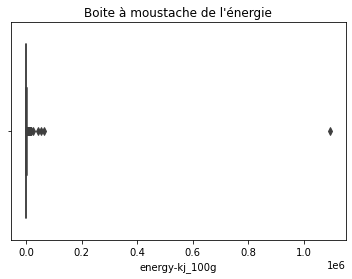

In [105]:
sns.boxplot(x='energy-kj_100g', data=df)
plt.title("Boite à moustache de l'énergie")
plt.show()

In [106]:
df[df['energy-kj_100g'] > 3766].shape

(5058, 19)

Ici, nous pouvons considérer que nous sommes en face d'une valeur abérante. Nous décidons de les supprimer.

In [107]:
df.drop(index = df[df['energy-kj_100g'] > 3766].index, inplace=True)

#### Les fibres

Ensuite, les aliments contenant le plus de fibre sont les pruneaux et les amande avec 16g pour 100g.<br/>
Aussi, toutes les valeurs supérieures peuvent être considérées comme éronnées.

In [108]:
df[df.fiber_100g > 20].shape

(1740, 19)

In [109]:
df.drop(index=df[df.fiber_100g > 20].index, inplace=True)

#### Les protéines

Les produits ayant le plus de protéine sont les gélatine alimentaires avec 88g de protéine par 100g.<br/>
Aussi, toute veleure supérieur sera considérée comme abérante.

In [110]:
df[df.proteins_100g > 88].shape

(245, 19)

In [111]:
df.drop(index=df[df.proteins_100g > 88].index, inplace=True)

#### Données restantes

In [112]:
df.describe()

,Unnamed: 0,additives_n,ecoscore_score_fr,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,627332.000000,218447.00000,218352.000000,614117.000000,608303.000000,612006.000000,608477.000000,611265.000000,135415.000000,610289.000000,593425.000000,280461.000000
mean,408125.191981,1.70456,43.617027,1130.976322,13.761018,5.310458,27.477490,13.847750,2.642424,8.712154,1.250791,9.531001
std,229770.120549,2.41299,27.218889,771.608444,16.522212,7.749275,27.734446,20.065139,3.219653,9.643253,4.300289,8.760526
min,1.000000,0.00000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,214619.500000,0.00000,24.000000,460.548000,1.000000,0.200000,2.900000,0.700000,0.100000,1.500000,0.060000,2.000000
50%,406425.500000,1.00000,39.000000,1088.568000,7.900000,2.000000,14.400000,3.600000,1.600000,6.100000,0.529000,10.000000
75%,611842.250000,3.00000,66.000000,1666.346400,22.000000,7.800000,52.400000,20.000000,3.600000,12.437500,1.300000,16.000000
max,800078.000000,30.00000,125.000000,3766.000000,100.000000,100.000000,100.000000,100.000000,20.000000,88.000000,100.000000,40.000000


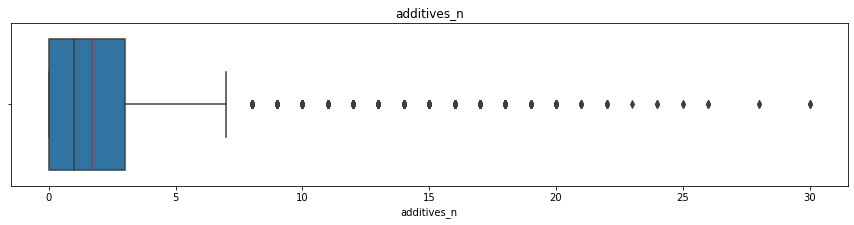

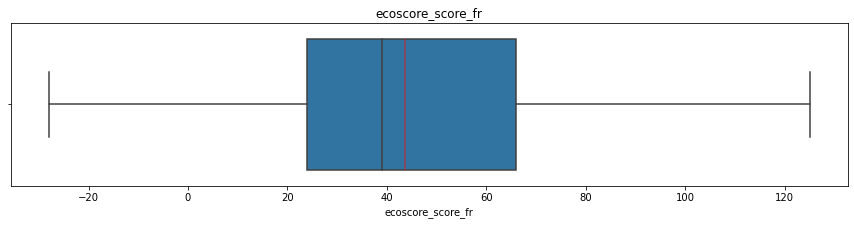

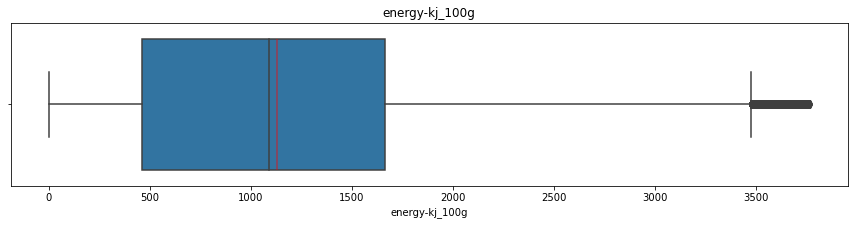

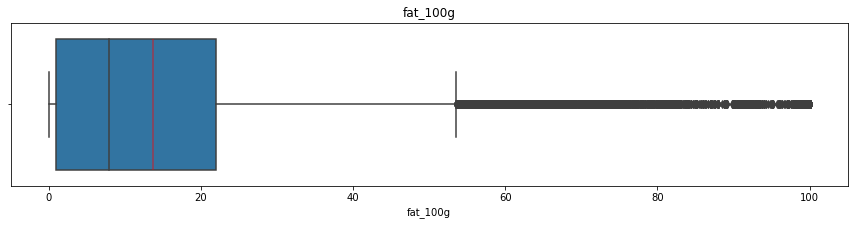

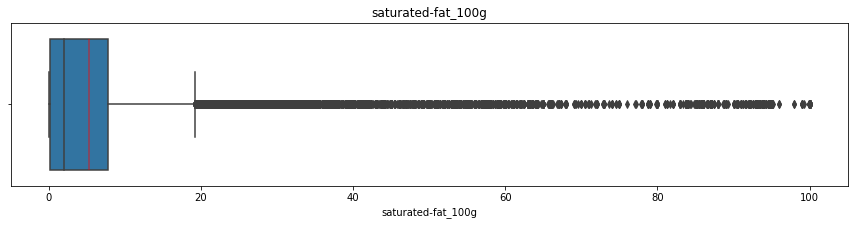

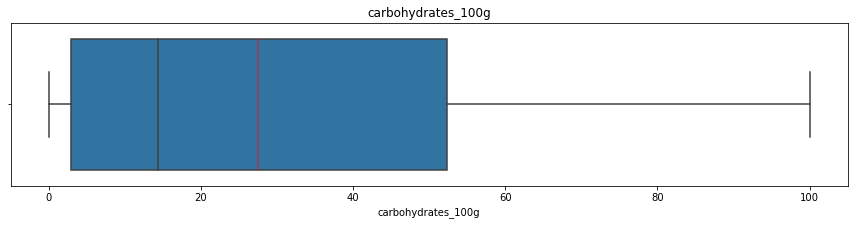

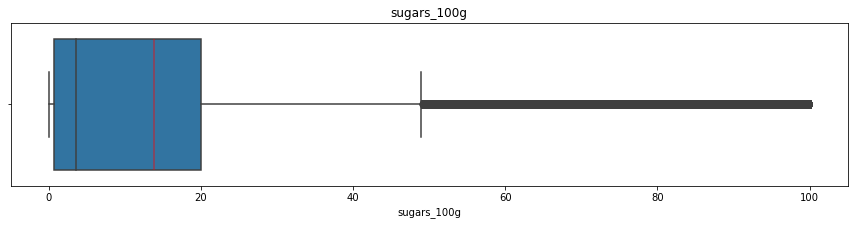

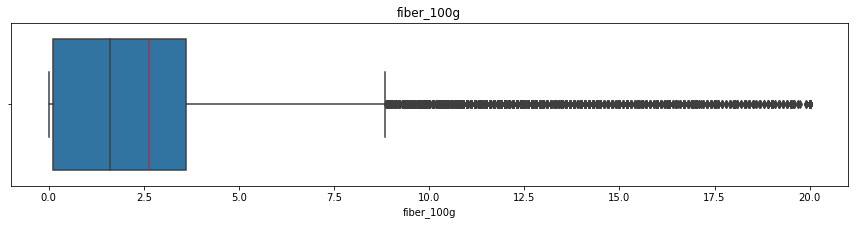

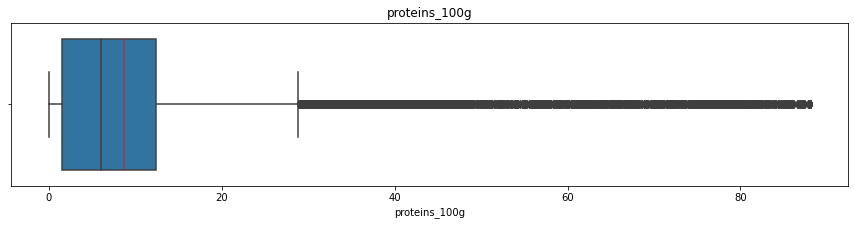

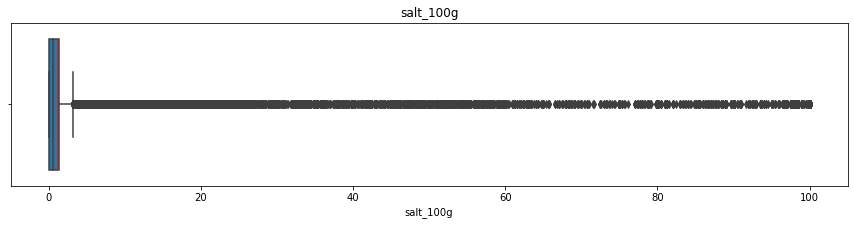

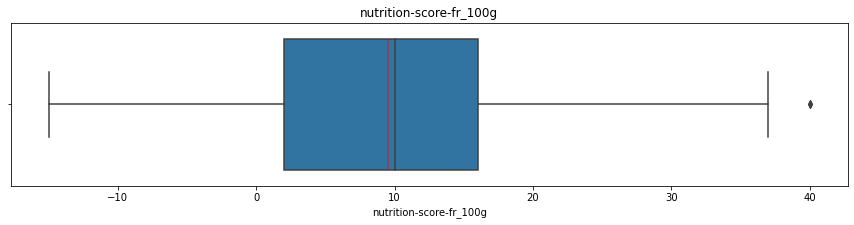

In [113]:
for c in df.columns:
    if df[c].dtypes == 'float':
        plt.figure(figsize=(15,3))
        sns.boxplot(x=c, data=df)
        plt.vlines(df[c].mean(),ymin=-0.4, ymax=0.4, color='red', alpha=0.5)
        plt.title(c)
        plt.show()

In [114]:
for c in df.columns:
    if df[c].dtypes == 'float':
        print(df.loc[:,['product_name', c]].sort_values(c, ascending=False).head(10))
        print('------------------------------------------------------------------------------------------')

                                             product_name  additives_n
100636                                         confiserie         30.0
100631                          escalope extra fine dinde         30.0
100637                       confiserie sans marque 188 g         30.0
321968                                   fraisier 8 parts         28.0
104936                                        confiseries         28.0
571727                                       rainbow cake         26.0
153864  assortiment de fruits secs, pâte d'amande et p...         26.0
171211                                    framboisier x 2         26.0
581663                                la rosquita serrana         25.0
340947                                       hot dogs x 2         25.0
------------------------------------------------------------------------------------------
                                          product_name  ecoscore_score_fr
250346                   24g 20st infusion sommeil mbp

In [115]:
df.reset_index(inplace=True, drop=True)

In [116]:
df.shape

(627332, 19)

In [117]:
df.isna().sum()

Unnamed: 0                      0
product_name                    0
brands                     279571
categories                 318432
additives_n                408885
pnns_groups_1                   0
pnns_groups_2                   0
ecoscore_score_fr          408980
image_url                   47207
energy-kj_100g              13215
fat_100g                    19029
saturated-fat_100g          15326
carbohydrates_100g          18855
sugars_100g                 16067
fiber_100g                 491917
proteins_100g               17043
salt_100g                   33907
nutrition-score-fr_100g    346871
nutriscore_grade           346875
dtype: int64

In [118]:
for c in df.columns:
    print('name : ',c, '/ number na :', df[c].isna().sum(), '/ % na :', round(((df[c].isna().sum())/df.shape[0])*100,0))

name :  Unnamed: 0 / number na : 0 / % na : 0.0
name :  product_name / number na : 0 / % na : 0.0
name :  brands / number na : 279571 / % na : 45.0
name :  categories / number na : 318432 / % na : 51.0
name :  additives_n / number na : 408885 / % na : 65.0
name :  pnns_groups_1 / number na : 0 / % na : 0.0
name :  pnns_groups_2 / number na : 0 / % na : 0.0
name :  ecoscore_score_fr / number na : 408980 / % na : 65.0
name :  image_url / number na : 47207 / % na : 8.0
name :  energy-kj_100g / number na : 13215 / % na : 2.0
name :  fat_100g / number na : 19029 / % na : 3.0
name :  saturated-fat_100g / number na : 15326 / % na : 2.0
name :  carbohydrates_100g / number na : 18855 / % na : 3.0
name :  sugars_100g / number na : 16067 / % na : 3.0
name :  fiber_100g / number na : 491917 / % na : 78.0
name :  proteins_100g / number na : 17043 / % na : 3.0
name :  salt_100g / number na : 33907 / % na : 5.0
name :  nutrition-score-fr_100g / number na : 346871 / % na : 55.0
name :  nutriscore_grad

In [119]:
(df.isna().sum().sum() / (df.shape[0]*df.shape[1]) )*100

23.341791318757767

In [120]:
(df.drop(['additives_n', 'ecoscore_score_fr', 'image_url', 'brands'], axis=1).isna().sum().sum() / (df.shape[0]*df.shape[1]-4) )*100

13.738528692614938

##### [sommaire](#S)

## III, Réduction du nombre de données incomplètes <a class='anchor' id='III'></a>

Notre principal problème concerne la colonne nutriscore qui est vide à 55%.<br/><br/>
Deux approches sont possibles : <br/>
-la suppression pure et simple des lignes n'ayant pas de nutriscore<br/>
-le comblement des données manquantes. Soit par un algorithme de regression, en cherchant le nutriscore, soit par un algorithme de classification en cherchant le nutri groupe. Dans les deux cas, nous nous servirons des données nutritionnelles, relativement complètes, pour entraîner nos modèles.

### A, Par suppression <a class='anchor' id='IIIA'></a>

In [121]:
df1 = df

In [122]:
df1 = df1[~df1['nutrition-score-fr_100g'].isna()]

In [123]:
df1.shape

(280461, 19)

In [124]:
df1.isna().sum()

Unnamed: 0                      0
product_name                    0
brands                      63305
categories                      0
additives_n                116659
pnns_groups_1                   0
pnns_groups_2                   0
ecoscore_score_fr           81185
image_url                   14090
energy-kj_100g                521
fat_100g                      474
saturated-fat_100g            473
carbohydrates_100g            571
sugars_100g                   474
fiber_100g                 180147
proteins_100g                 471
salt_100g                     410
nutrition-score-fr_100g         0
nutriscore_grade                4
dtype: int64

In [125]:
df1.isna().sum().sum() / (df1.shape[0] * df.shape[1])

0.08609584332862492

In [126]:
df1.rename(columns={'nutrition-score-fr_100g': 'nutriscore', 'nutriscore_grade': 'nutrigrade' }, inplace=True)

C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [127]:
df1 = df1.drop(['additives_n', 'ecoscore_score_fr', 'Unnamed: 0'], axis=1)

In [128]:
#df1.to_csv('def_short.csv')

La première méthode nous donne un jeu de données de 280462 lignes et 19 colonnes avec 9% de données manquantes.


### B, Par regression <a class='anchor' id='IIIB'></a>

Pour les regression, nous allons essayer de voir la correlation de chaque variable numérique avec la variable nutriscore.

In [129]:
nutri = ['energy-kj_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g']

In [130]:
for c in nutri:
    if df[c].dtypes == 'float':
        dft = df.loc[:,['nutrition-score-fr_100g', c]]
        dft.dropna(inplace=True)
        matrix = dft.corr(method='pearson')
        print(c)
        print(matrix)
        print('-------------------------------------------------------')

energy-kj_100g
                         nutrition-score-fr_100g  energy-kj_100g
nutrition-score-fr_100g                 1.000000        0.579182
energy-kj_100g                          0.579182        1.000000
-------------------------------------------------------
fat_100g
                         nutrition-score-fr_100g  fat_100g
nutrition-score-fr_100g                   1.0000    0.5045
fat_100g                                  0.5045    1.0000
-------------------------------------------------------
saturated-fat_100g
                         nutrition-score-fr_100g  saturated-fat_100g
nutrition-score-fr_100g                 1.000000            0.584797
saturated-fat_100g                      0.584797            1.000000
-------------------------------------------------------
carbohydrates_100g
                         nutrition-score-fr_100g  carbohydrates_100g
nutrition-score-fr_100g                 1.000000            0.216604
carbohydrates_100g                      0.216604     

Dans un premier temps nous allons créer un jeu de donnée sans valeurs nulles que nous allons subdiviser en jeu d'entrainement et jeu de test afin d'exercer notre modèle. 

In [131]:
nutri.append('nutriscore_grade')

In [132]:
reg_df = df.loc[:,nutri]

In [133]:
reg_df.dropna(inplace=True)

In [134]:
X = reg_df.iloc[:,:-2].values
y = reg_df['nutrition-score-fr_100g'].values

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
rand_n = np.random.randint(15)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_n)

Nous allons essayer une regression linéaire et une regression KNN

#### Regression linéaire

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
reg = LinearRegression()

In [140]:
reg.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred = reg.predict(X_test)

In [142]:
reg.score(X_test, y_test)

0.5738120751619129

In [143]:
from sklearn import metrics

In [144]:
#RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

5.721816728186446

In [145]:
rmse / (y_test.max() - y_test.min())

0.11003493708050857

In [146]:
df_pred = pd.DataFrame(list(zip(y_test, y_pred)), columns=['y_test', 'y_pred'])

In [147]:
df_pred['diff'] = df_pred.y_test - df_pred.y_pred

In [148]:
df_pred.sort_values(by='diff')

,y_test,y_pred,diff
54302,19.0,98.882789,-79.882789
43426,10.0,81.947938,-71.947938
34784,10.0,80.324387,-70.324387
36705,27.0,95.406889,-68.406889
23730,13.0,78.082201,-65.082201
...,...,...,...
40196,28.0,7.664951,20.335049
54982,30.0,8.802739,21.197261
51791,29.0,7.177038,21.822962
19390,24.0,1.834842,22.165158


#### Regression KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [150]:
knnR = KNeighborsRegressor()

In [151]:
knnR.fit(X_train, y_train)

KNeighborsRegressor()

In [152]:
y_pred_K = knnR.predict(X_test)

In [153]:
df_pred['pred_knnR'] = y_pred_K

In [154]:
df_pred['diffK'] = df_pred.y_pred - df_pred.pred_knnR

In [155]:
df_pred.describe()

,y_test,y_pred,diff,pred_knnR,diffK
count,55951.000000,55951.000000,55951.000000,55951.000000,55951.000000
mean,9.531840,9.515814,0.016027,9.453275,0.062539
std,8.764704,6.620686,5.721845,8.258204,5.128233
min,-15.000000,-2.658122,-79.882789,-11.000000,-14.952926
25%,2.000000,4.168450,-3.692914,2.400000,-3.754840
50%,10.000000,7.935736,-0.225562,9.400000,0.255951
75%,16.000000,13.767010,4.410586,15.600000,3.283946
max,37.000000,98.882789,23.426664,31.000000,76.682789


In [156]:
knnR.score(X_test, y_test)

0.8411737620097692

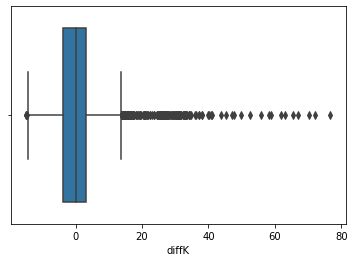

In [157]:
sns.boxplot(x='diffK', data=df_pred)
plt.show()

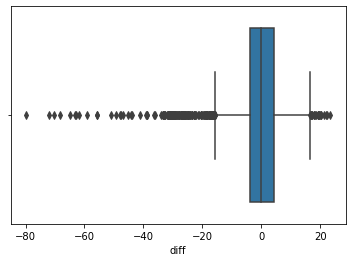

In [158]:
sns.boxplot(x='diff', data=df_pred)
plt.show()

### C, Par classification <a class='anchor' id='IIIC'></a>

In [159]:
knn = KNeighborsClassifier(n_neighbors=5)

In [160]:
y = reg_df['nutriscore_grade'].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_n)

In [162]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [163]:
error = 1 - knn.score(X_test, y_test)
error

0.2807635252274312

In [164]:
y_pred = knn.predict(X_test)

### D, Comparaison <a class='anchor' id='IIID'></a>

In [165]:
verif = pd.DataFrame(X_test, columns=nutri[:-2])

In [166]:
y_conv = []
for v in y_pred_K:
    if v < 0:
        y_conv.append('a')
    elif v < 3:
        y_conv.append('b')
    elif v < 11 :
        y_conv.append('c')
    elif v < 19 :
        y_conv.append('d')
    else :
        y_conv.append('e')

In [167]:
verif['y_pred_R'] = y_conv
verif['y_pred_C'] = y_pred
verif['y_test'] = y_test

In [168]:
verif.head()

,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,y_pred_R,y_pred_C,y_test
0,1578.4236,29.0,19.5,2.0,2.0,27.0,0.900,d,d,d
1,1955.2356,17.5,10.0,68.6,36.3,6.7,0.520,e,e,e
2,180.0324,0.5,0.1,10.0,10.0,0.5,0.010,c,c,c
3,1339.7760,0.0,0.0,75.0,0.0,0.8,0.000,c,c,c
4,1256.0000,18.8,6.9,16.4,3.3,16.6,0.632,d,d,d


In [169]:
cf_matrix_R = metrics.confusion_matrix(verif.y_test.values, verif.y_pred_R.values, normalize='true')
cf_matrix_C = metrics.confusion_matrix(verif.y_test.values, verif.y_pred_C.values, normalize='true')

In [170]:
cf_matrix_R

array([[6.74811782e-01, 2.14898957e-01, 9.94584599e-02, 1.08308017e-02,
        0.00000000e+00],
       [1.90922680e-01, 5.54966707e-01, 2.32232640e-01, 2.14703085e-02,
        4.07664085e-04],
       [3.29435019e-02, 1.74600560e-01, 6.83742382e-01, 1.06078076e-01,
        2.63548015e-03],
       [5.82941876e-03, 1.56205784e-02, 2.29384798e-01, 7.04114551e-01,
        4.50506537e-02],
       [5.35236396e-03, 9.45584300e-03, 7.90365745e-02, 2.06512043e-01,
        6.99643176e-01]])

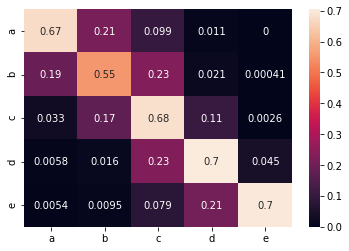

In [171]:
sns.heatmap(cf_matrix_R, annot=True, xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'])
plt.savefig("matrice_correlation_regression_nombre.png", bbox_inches='tight', transparent=True)
plt.show()

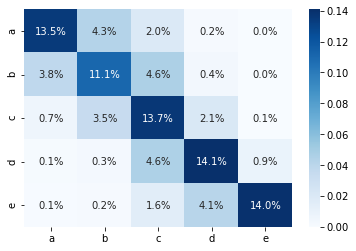

In [172]:
sns.heatmap(cf_matrix_R/np.sum(cf_matrix_R), annot=True, fmt='.1%', cmap='Blues',xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'])
plt.savefig("matrice_correlation_regression_%.png", bbox_inches='tight', transparent=True)
plt.show()

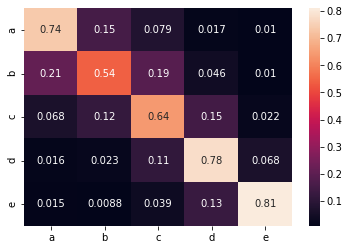

In [173]:
sns.heatmap(cf_matrix_C, annot=True,xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'])
plt.savefig("matrice_correlation_classification_nombre.png", bbox_inches='tight', transparent=True)
plt.show()

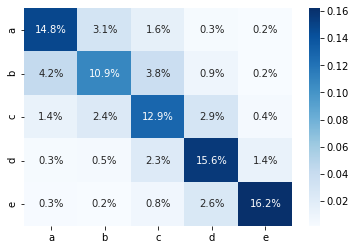

In [174]:
sns.heatmap(cf_matrix_C/np.sum(cf_matrix_C), annot=True, fmt='.1%', cmap='Blues',xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'])
plt.savefig("matrice_correlation_classification_%.png", bbox_inches='tight', transparent=True)
plt.show()

La première méthode, par suppression, est celle qui produit les données les plus fiables. <br/>
Néanmoins, le jeu de donnée final contient 2 fois  moins de références que pour les autres méthodes.

Il apparaît que les deux méthodes (par regression et par classification) donnent des résultats comparables.<br/>
Néanmoins, la méthode par classification est celle qui a les meilleurs résultats. Aussi, nous allons nous en servir pour remplir le jeu de données.

In [175]:
cf_matrix = metrics.confusion_matrix(verif.y_pred_R.values, verif.y_pred_C.values)

In [176]:
verif = 0
for n in range(0, len(cf_matrix)):
    verif += cf_matrix[n,n]
verif = verif / cf_matrix.sum()
print(round(verif*100,0), "% soit le taux de corrélation entre la regression et la classification KNN")

78.0 % soit le taux de corrélation entre la regression et la classification KNN


In [177]:
nutri_values = nutri[:-2]
nutri_values

['energy-kj_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g']

In [178]:
df1 = df.dropna(subset=nutri_values)

In [179]:
df1.reset_index(inplace=True, drop=True)

In [180]:
df2 = df1.loc[:,nutri]

In [181]:
X = df2.iloc[:,:-2].values

In [182]:
df2['nutriscore_pred'] = knnR.predict(X)
df2['nutrigrad_pred'] = knn.predict(X)

In [183]:
df2.shape

(579131, 11)

In [184]:
df.shape

(627332, 19)

In [185]:
df2.head()

,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade,nutriscore_pred,nutrigrad_pred
0,1570.0500,7.0,3.08,70.1,15.0,7.8,1.40,NaN,NaN,-1.4,a
1,936.0000,8.2,2.20,29.0,22.0,5.1,4.60,18.0,d,12.2,d
2,87.9228,0.0,0.00,4.8,0.4,0.2,2.04,NaN,NaN,6.0,c
3,251.2080,3.0,1.00,10.0,3.0,2.0,1.15,NaN,NaN,3.2,b
4,263.7684,0.0,0.00,15.5,15.5,0.2,0.00,NaN,NaN,13.0,d


In [186]:
nutriscore = []
for r in range(0, df2.shape[0]):
    if np.isnan(df2['nutrition-score-fr_100g'][r]):
        nutriscore.append(df2.nutriscore_pred[r])
    else :
        nutriscore.append(df2['nutrition-score-fr_100g'][r])

In [187]:
nutrigrade = []
for r in range(0, df2.shape[0]):
    if str(df2['nutriscore_grade'][r]) == 'nan':
        nutrigrade.append(df2.nutrigrad_pred[r])
    else :
        nutrigrade.append(df2['nutriscore_grade'][r])

In [188]:
df_def = df1.loc[:,['product_name', 'brands', 'categories', 'pnns_groups_1', 'pnns_groups_2', 'image_url', 'energy-kj_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']]

In [189]:
df_def['nutriscore'] = nutriscore
df_def['nutrigrade'] = nutrigrade

In [190]:
df_def.head()

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade
0,vitória crackers,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,1570.0500,7.0,3.08,70.1,15.0,NaN,7.8,1.40,-1.4,a
1,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,936.0000,8.2,2.20,29.0,22.0,0.0,5.1,4.60,18.0,d
2,sauce sweety chili 0%,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,87.9228,0.0,0.00,4.8,0.4,NaN,0.2,2.04,6.0,c
3,mini coco,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,251.2080,3.0,1.00,10.0,3.0,NaN,2.0,1.15,3.2,b
4,pur jus de pomme,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,263.7684,0.0,0.00,15.5,15.5,NaN,0.2,0.00,13.0,d


In [191]:
df_def.shape

(579131, 16)

In [192]:
df_def.isna().sum()

product_name               0
brands                248175
categories            285463
pnns_groups_1              0
pnns_groups_2              0
image_url              41734
energy-kj_100g             0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g            447514
proteins_100g              0
salt_100g                  0
nutriscore                 0
nutrigrade                 0
dtype: int64

In [193]:
df_def.to_csv('df_def.csv')

In [194]:
df_def = pd.read_csv('df_def.csv', index_col=0)

In [195]:
y_nutri = []
for v in df_def.nutriscore:
    if v < 0:
        y_nutri.append('a')
    elif v < 3:
        y_nutri.append('b')
    elif v < 11 :
        y_nutri.append('c')
    elif v < 19 :
        y_nutri.append('d')
    else :
        y_nutri.append('e')

In [196]:
cf_matrix = metrics.confusion_matrix(df_def.nutrigrade.values, y_nutri)

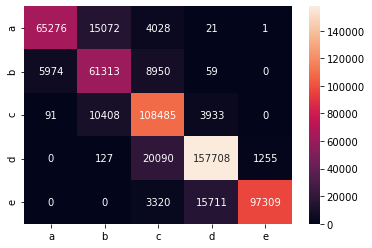

In [197]:
sns.heatmap(cf_matrix, annot=True, xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'], fmt='d')
plt.savefig("matrice_correlation_nutriscore_nutrigrade_nombre.png", bbox_inches='tight', transparent=True)
plt.show()

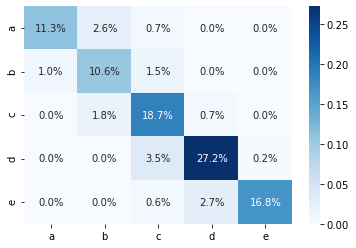

In [198]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%', cmap='Blues',xticklabels=['a', 'b', 'c', 'd', 'e'], yticklabels=['a', 'b', 'c', 'd', 'e'])
plt.savefig("matrice_correlation_nutriscore_nutrigrade_%.png", bbox_inches='tight', transparent=True)
plt.show()

In [199]:
verif = 0
for n in range(0, len(cf_matrix)):
    verif += cf_matrix[n,n]
verif = verif / cf_matrix.sum()
print(round(verif*100,0), "% soit le taux de corrélation entre le nutriscore et le nutrigrade")

85.0 % soit le taux de corrélation entre le nutriscore et le nutrigrade


In [200]:
df_def.head()

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade
0,vitória crackers,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,1570.0500,7.0,3.08,70.1,15.0,NaN,7.8,1.40,-1.4,a
1,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,936.0000,8.2,2.20,29.0,22.0,0.0,5.1,4.60,18.0,d
2,sauce sweety chili 0%,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,87.9228,0.0,0.00,4.8,0.4,NaN,0.2,2.04,6.0,c
3,mini coco,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,251.2080,3.0,1.00,10.0,3.0,NaN,2.0,1.15,3.2,b
4,pur jus de pomme,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,263.7684,0.0,0.00,15.5,15.5,NaN,0.2,0.00,13.0,d


In [201]:
df_def.columns

Index(['product_name', 'brands', 'categories', 'pnns_groups_1',
       'pnns_groups_2', 'image_url', 'energy-kj_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutriscore', 'nutrigrade'],
      dtype='object')

In [202]:
df_def.isna().sum()

product_name               0
brands                248175
categories            285463
pnns_groups_1              0
pnns_groups_2              0
image_url              41734
energy-kj_100g             0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g            447514
proteins_100g              0
salt_100g                  0
nutriscore                 0
nutrigrade                 0
dtype: int64

In [203]:
round((df_def.isna().sum().sum() / (df_def.shape[0] * df_def.shape[1]))*100,2)

11.04

In [204]:
df_def[df_def.carbohydrates_100g < 0]

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade


##### [sommaire](#S)